In [1]:
!pip install catboost


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



In [3]:
data=pd.read_csv('final_data.csv')
data['label'] = data['label'].replace({'inactive': 0, 'active': 1})
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
bold_text = "\033[1m"
reset_formatting = "\033[0m"

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import numpy as np
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb


# Define base models
base_learners = [
                 ('cat', CatBoostClassifier(logging_level='Silent')),
                 ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
                 ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                 ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
                ]

# Define meta model
meta_learner = LogisticRegression()

# Define stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Fit stacking model
stacking_model.fit(X_train, y_train)

# Predictions
train_preds = stacking_model.predict(X_train)
test_preds = stacking_model.predict(X_test)

# Metrics
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_preds):.5f}")
print(f"Precision: {precision_score(y_train, train_preds):.5f}")
print(f"Recall: {recall_score(y_train, train_preds):.5f}")
print(f"F1-score: {f1_score(y_train, train_preds):.5f}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_preds):.5f}")
print(f"Precision: {precision_score(y_test, test_preds):.5f}")
print(f"Recall: {recall_score(y_test, test_preds):.5f}")
print(f"F1-score: {f1_score(y_test, test_preds):.5f}")


Training Metrics:
Accuracy: 0.98727
Precision: 0.98280
Recall: 0.99673
F1-score: 0.98971

Testing Metrics:
Accuracy: 0.80509
Precision: 0.81263
Recall: 0.88634
F1-score: 0.84788


In [9]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb

# Define base models
base_learners = [
                 ('cat', CatBoostClassifier(logging_level='Silent')),
                 ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
                 ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                 ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
                ]

# Define a voting classifier
voting_model = VotingClassifier(estimators=base_learners, voting='soft')  # or 'hard'

# Fit voting model
voting_model.fit(X_train, y_train)

# Predictions
train_preds = voting_model.predict(X_train)
test_preds = voting_model.predict(X_test)

# Metrics
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_preds):.5f}")
print(f"Precision: {precision_score(y_train, train_preds):.5f}")
print(f"Recall: {recall_score(y_train, train_preds):.5f}")
print(f"F1-score: {f1_score(y_train, train_preds):.5f}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_preds):.5f}")
print(f"Precision: {precision_score(y_test, test_preds):.5f}")
print(f"Recall: {recall_score(y_test, test_preds):.5f}")
print(f"F1-score: {f1_score(y_test, test_preds):.5f}")


Training Metrics:
Accuracy: 0.98710
Precision: 0.98279
Recall: 0.99646
F1-score: 0.98958

Testing Metrics:
Accuracy: 0.80107
Precision: 0.81087
Recall: 0.88087
F1-score: 0.84442


In [10]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost as xgb

# Define base models
base_learners = [
                 ('cat', CatBoostClassifier(logging_level='Silent')),
                 ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
                 ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                 ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
                ]

# Define a voting classifier
voting_model = VotingClassifier(estimators=base_learners, voting='hard')  # or 'hard'

# Fit voting model
voting_model.fit(X_train, y_train)

# Predictions
train_preds = voting_model.predict(X_train)
test_preds = voting_model.predict(X_test)

# Metrics
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_preds):.5f}")
print(f"Precision: {precision_score(y_train, train_preds):.5f}")
print(f"Recall: {recall_score(y_train, train_preds):.5f}")
print(f"F1-score: {f1_score(y_train, train_preds):.5f}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_preds):.5f}")
print(f"Precision: {precision_score(y_test, test_preds):.5f}")
print(f"Recall: {recall_score(y_test, test_preds):.5f}")
print(f"F1-score: {f1_score(y_test, test_preds):.5f}")


Training Metrics:
Accuracy: 0.98543
Precision: 0.98589
Recall: 0.99046
F1-score: 0.98817

Testing Metrics:
Accuracy: 0.80509
Precision: 0.81967
Recall: 0.87432
F1-score: 0.84611


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import numpy as np

# Define and fit base models
model_cat = CatBoostClassifier(logging_level='Silent').fit(X_train, y_train)
model_et = ExtraTreesClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict probabilities
def get_weighted_preds(models, weights, X):
    preds = [model.predict_proba(X)[:, 1] for model in models]
    final_preds = np.zeros_like(preds[0])
    for i in range(len(models)):
        final_preds += weights[i] * preds[i]
    return (final_preds > 0.5).astype(int)

# Weights for each model
weights = [0.25, 0.5, 0, 0.25]

# Predictions
train_preds = get_weighted_preds([model_cat, model_et, model_xgb, model_rf], weights, X_train)
test_preds = get_weighted_preds([model_cat, model_et, model_xgb, model_rf], weights, X_test)

# Metrics
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_preds):.5f}")
print(f"Precision: {precision_score(y_train, train_preds):.5f}")
print(f"Recall: {recall_score(y_train, train_preds):.5f}")
print(f"F1-score: {f1_score(y_train, train_preds):.5f}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_preds):.5f}")
print(f"Precision: {precision_score(y_test, test_preds):.5f}")
print(f"Recall: {recall_score(y_test, test_preds):.5f}")
print(f"F1-score: {f1_score(y_test, test_preds):.5f}")


Training Metrics:
Accuracy: 0.98727
Precision: 0.98254
Recall: 0.99700
F1-score: 0.98972

Testing Metrics:
Accuracy: 0.80844
Precision: 0.81294
Recall: 0.89290
F1-score: 0.85104


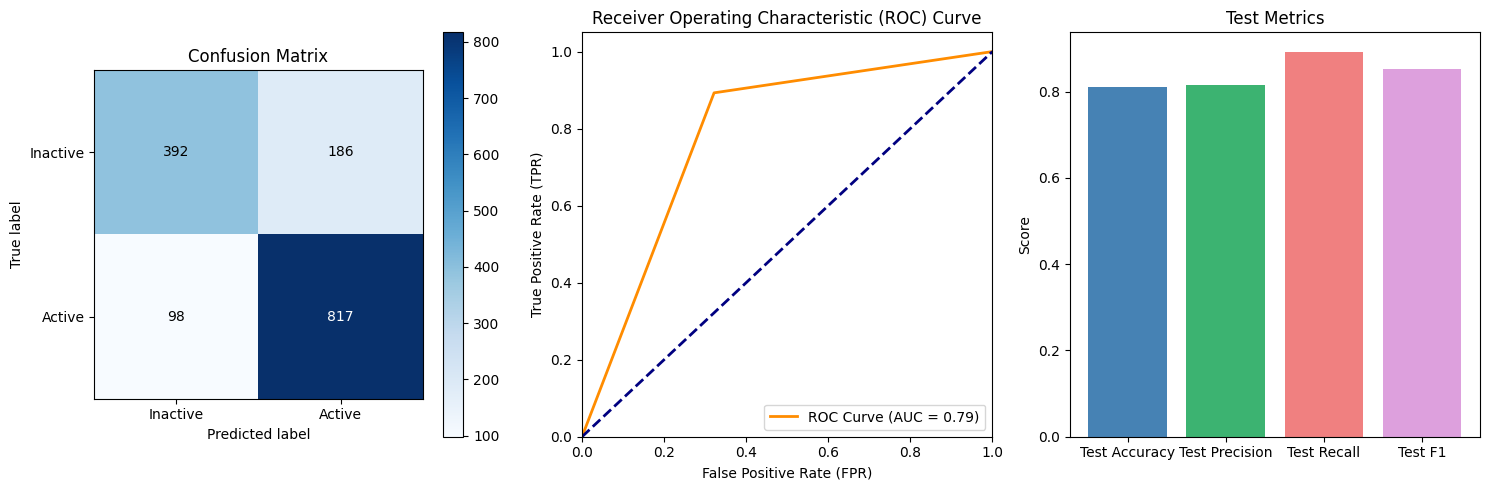

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import numpy as np

# Define and fit base models
model_cat = CatBoostClassifier(logging_level='Silent').fit(X_train, y_train)
model_et = ExtraTreesClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict probabilities
def get_weighted_preds(models, weights, X):
    preds = [model.predict_proba(X)[:, 1] for model in models]
    final_preds = np.zeros_like(preds[0])
    for i in range(len(models)):
        final_preds += weights[i] * preds[i]
    return (final_preds > 0.5).astype(int)

# Weights for each model
weights = [0.25, 0.5, 0, 0.25]

# Predictions
train_preds = get_weighted_preds([model_cat, model_et, model_xgb, model_rf], weights, X_train)
test_preds = get_weighted_preds([model_cat, model_et, model_xgb, model_rf], weights, X_test)

# Calculate metrics for training dataset
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds)

# Calculate metrics for testing dataset
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)

# ROC Curve and AUC for the testing dataset
y_proba_test = get_weighted_preds([model_cat, model_et, model_xgb, model_rf], weights, X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

# Confusion Matrix for the testing dataset
conf_matrix = confusion_matrix(y_test, test_preds)

# Create a figure with multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Confusion Matrix
im = ax1.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax1.figure.colorbar(im, ax=ax1)
ax1.set(xticks=np.arange(2),  # Set x-axis ticks to represent 'Inactive' and 'Active'
        yticks=np.arange(2),  # Set y-axis ticks to represent 'Inactive' and 'Active'
        title='Confusion Matrix',
        xlabel='Predicted label',
        ylabel='True label')

# Set x and y axis tick labels to 'Inactive' and 'Active'
ax1.set_xticklabels(['Inactive', 'Active'])
ax1.set_yticklabels(['Inactive', 'Active'])

# Annotate confusion matrix cells
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax1.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")


# Plot the ROC Curve
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc="lower right")

# Plot the Bar Chart
ax3.bar(metrics_names, metrics_values, color=['steelblue', 'mediumseagreen', 'lightcoral', 'plum'])
ax3.set_title('Test Metrics')
ax3.set_ylabel('Score')

plt.tight_layout()
plt.show()
